<a href="https://colab.research.google.com/github/Kajalsah1/2418104_kajalsah/blob/main/Kajal_Sah_SPF_regressionn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

file_path = 'StudentPerformanceFactors.csv'

df = pd.read_csv(file_path)

print(df.head())
print(df.info())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [3]:
print(df.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [4]:
df['Teacher_Quality'] = df['Teacher_Quality'].fillna('medium')

print(df.isnull().sum())


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality                0
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [5]:
# Fill missing values with the mode
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
print(df.isnull().sum())


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality                0
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level       0
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [6]:
#Distance_from_Home
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])
print(df.isnull().sum())



Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [7]:
# Get column names as an Index object
features = df.columns

# Convert to a list (if needed)
features_list = list(df.columns)

print(features_list)


['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']


In [8]:
categorical_columns = ['Parental_Involvement','Access_to_Resources','Extracurricular_Activities','Motivation_Level','Internet_Access','Family_Income','Teacher_Quality','School_Type','Peer_Influence','Learning_Disabilities','Parental_Education_Level','Distance_from_Home','Gender']

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()  # Instantiate the LabelEncoder

for col in df.columns:
    if df[col].dtype == 'object':  # Check for categorical/string data
        df[col] = label_encoder.fit_transform(df[col])  # Apply label encoding

df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,1,0,2,1,2,2,0,1,2,0,68
6603,23,76,0,2,0,8,81,2,1,3,1,0,1,2,2,0,1,2,0,69
6604,20,90,2,1,1,6,65,1,1,3,1,2,1,0,2,0,2,2,0,68
6605,10,86,0,0,1,6,91,0,1,2,1,2,0,2,3,0,1,0,0,68


In [10]:
df.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,1.220070,1.203421,0.596035,7.02906,75.070531,1.307553,0.924474,1.493719,1.211442,1.322991,0.695929,1.190858,2.967610,0.105191,0.896473,1.498411,0.577267,67.235659
std,5.990594,11.547475,0.865634,0.871783,0.490728,1.46812,14.399784,0.782515,0.264258,1.230570,0.742264,0.912020,0.460048,0.755876,1.031231,0.306823,0.698511,0.670260,0.494031,3.890456
min,1.000000,60.000000,0.000000,0.000000,0.000000,4.00000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,0.000000,0.000000,0.000000,6.00000,63.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,65.000000
50%,20.000000,80.000000,2.000000,2.000000,1.000000,7.00000,75.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,1.000000,2.000000,1.000000,67.000000
75%,24.000000,90.000000,2.000000,2.000000,1.000000,8.00000,88.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,4.000000,0.000000,1.000000,2.000000,1.000000,69.000000
max,44.000000,100.000000,2.000000,2.000000,1.000000,10.00000,100.000000,2.000000,1.000000,8.000000,2.000000,3.000000,1.000000,2.000000,6.000000,1.000000,2.000000,2.000000,1.000000,101.000000


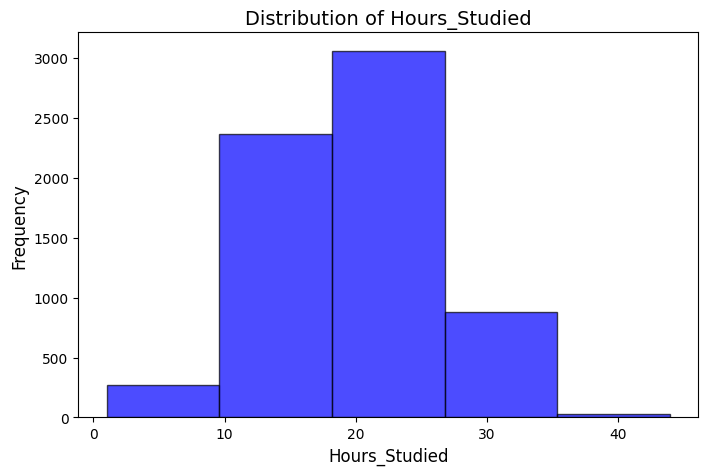

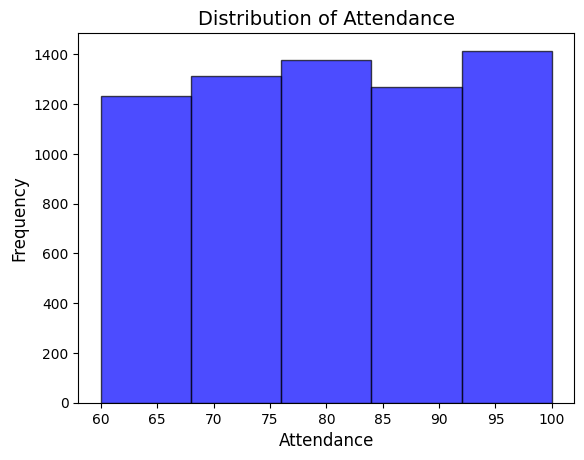

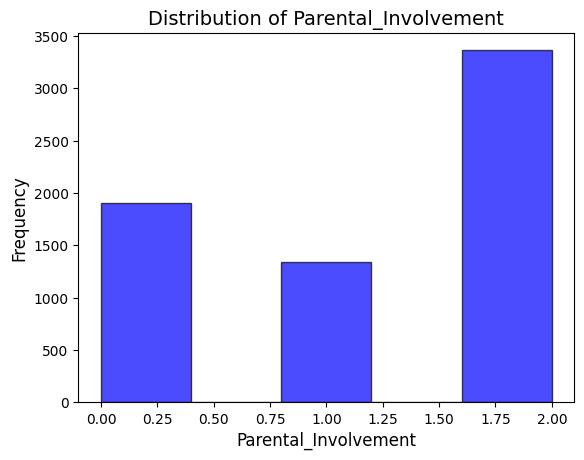

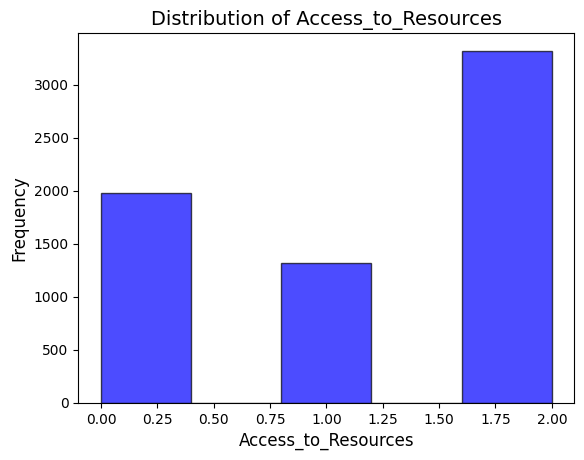

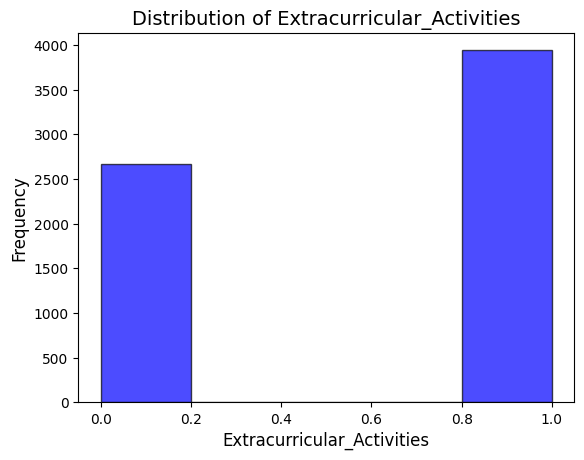

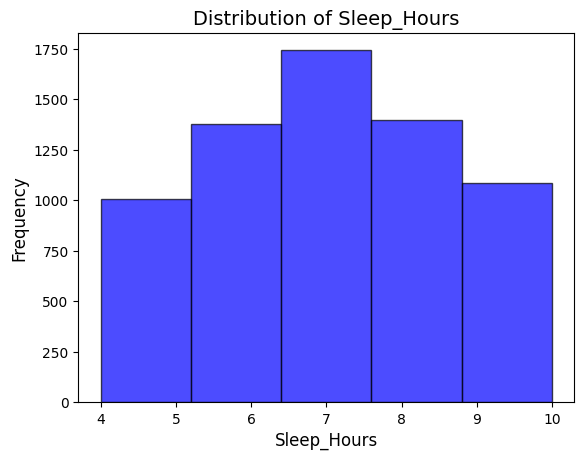

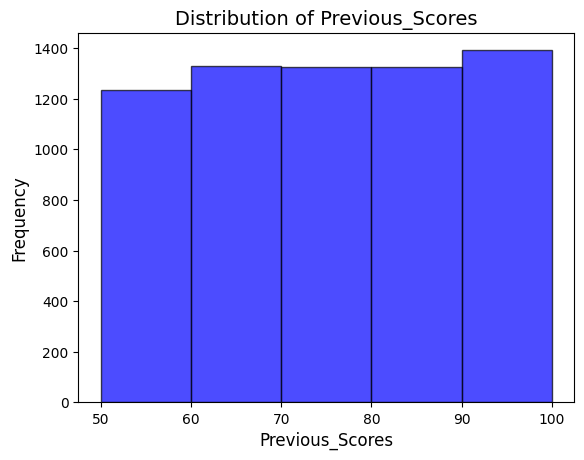

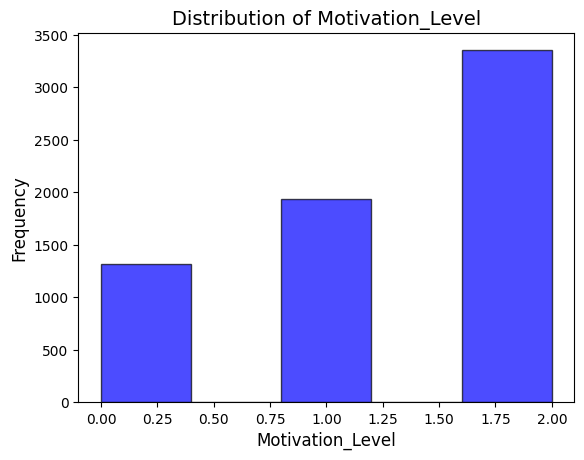

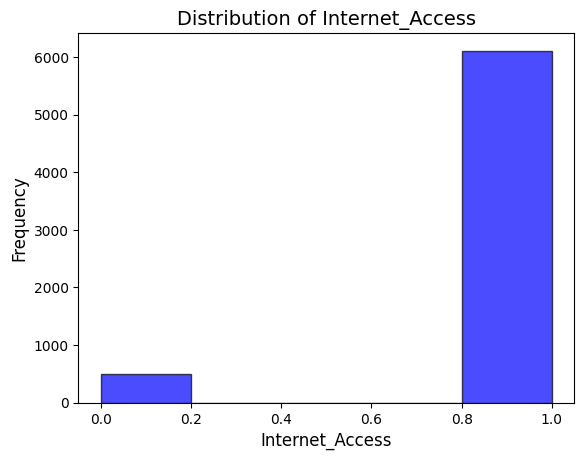

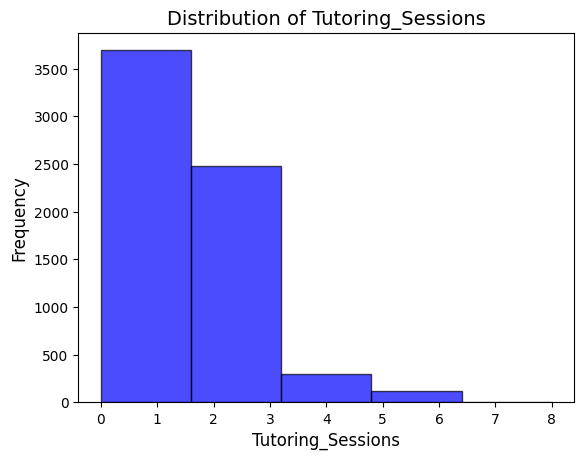

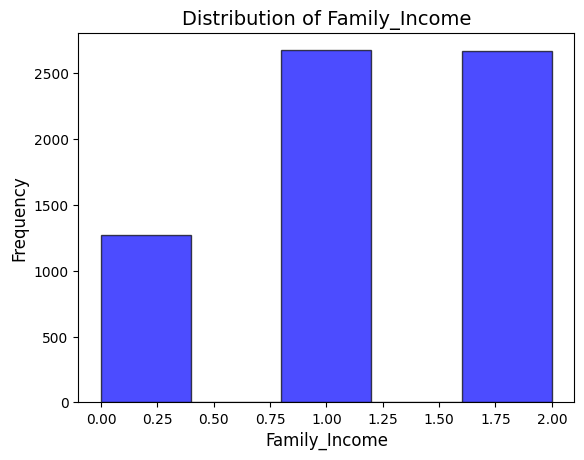

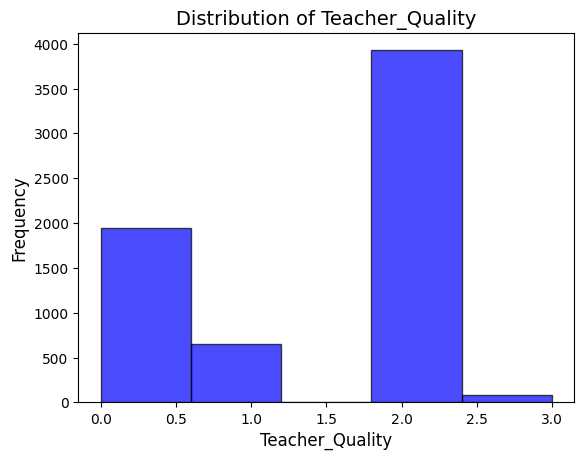

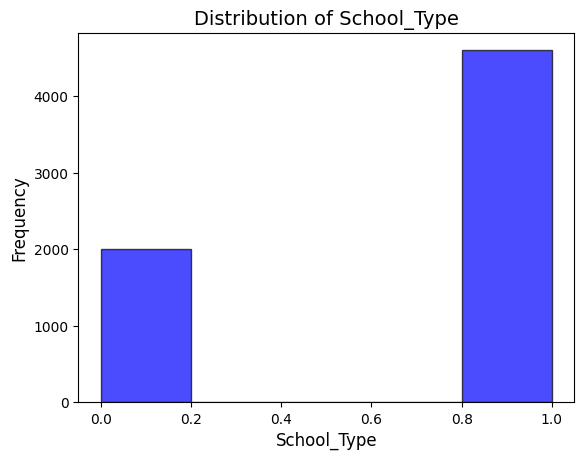

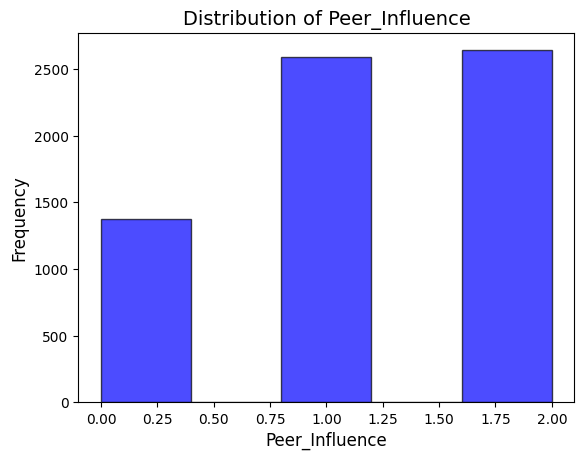

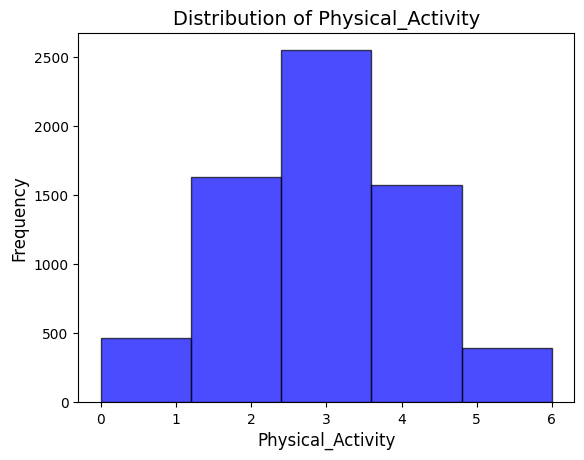

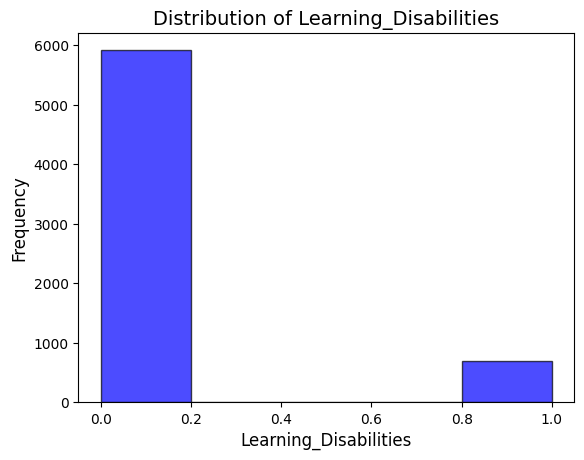

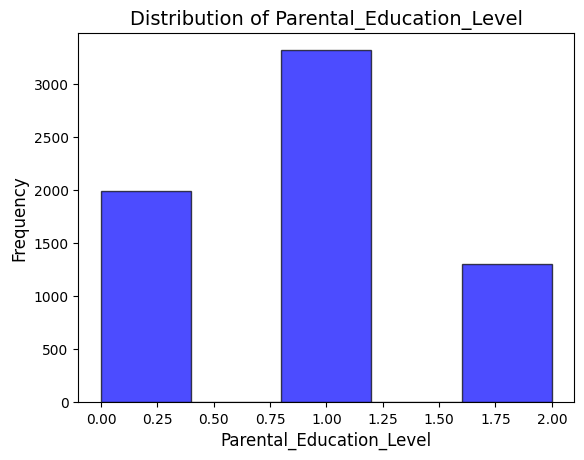

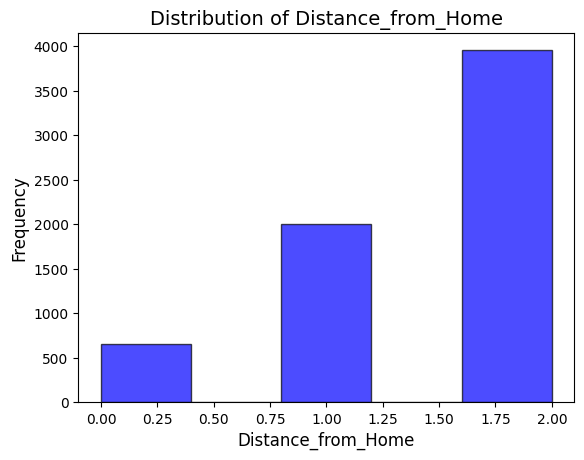

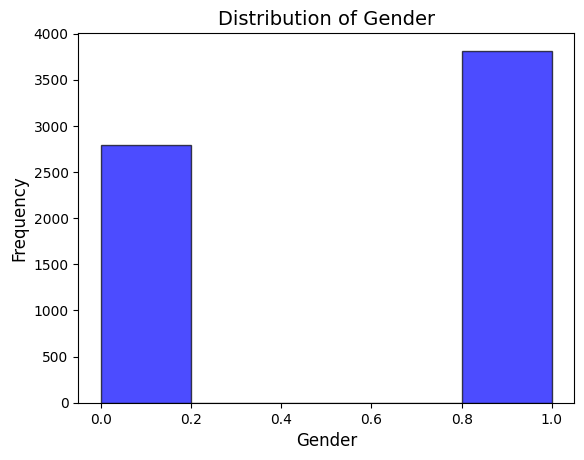

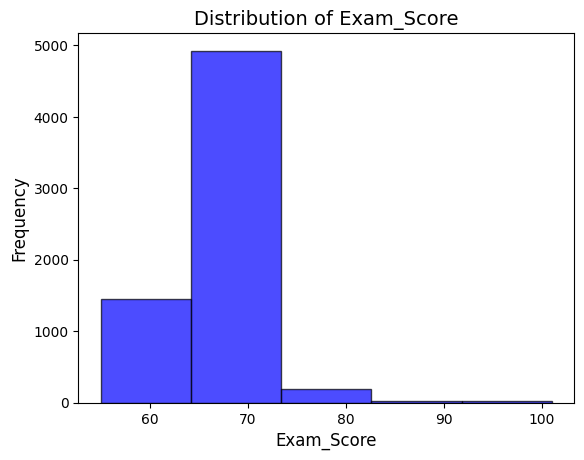

In [11]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Distance_from_Home'] = label_encoder.fit_transform(df['Distance_from_Home'])

plt.figure(figsize=(8, 5))

for col in df.columns:
    plt.hist(df[col], bins=5, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)  # Fixed f-string
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

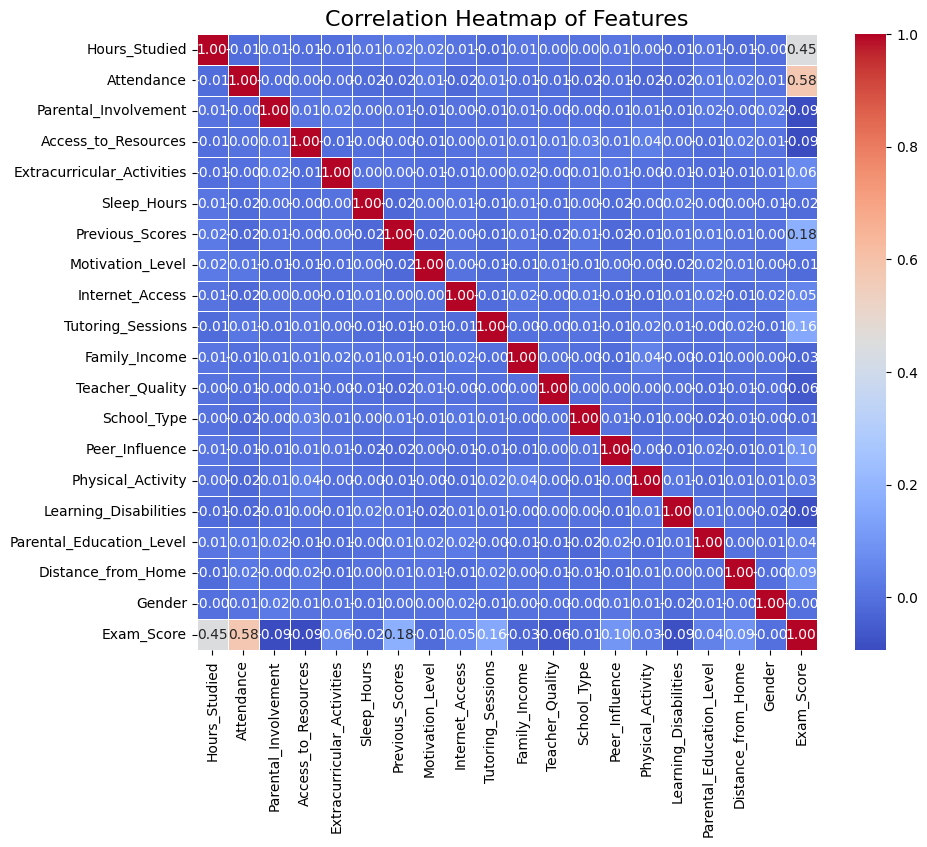

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

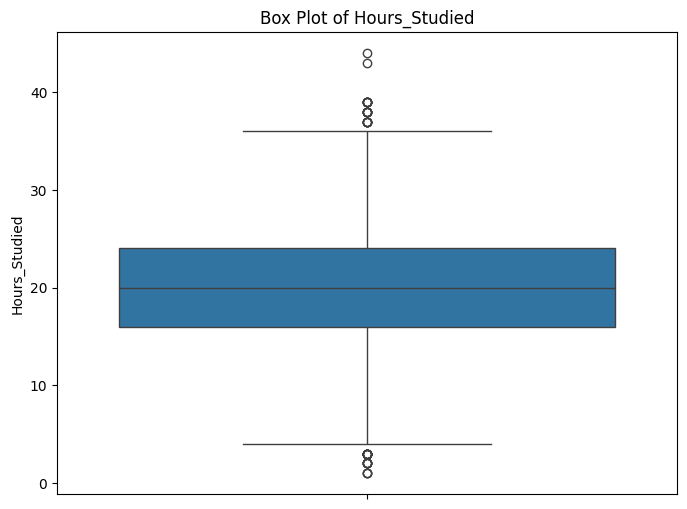

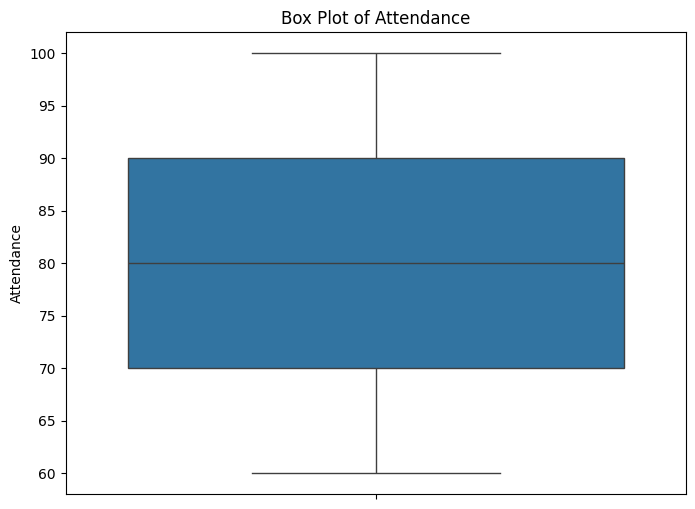

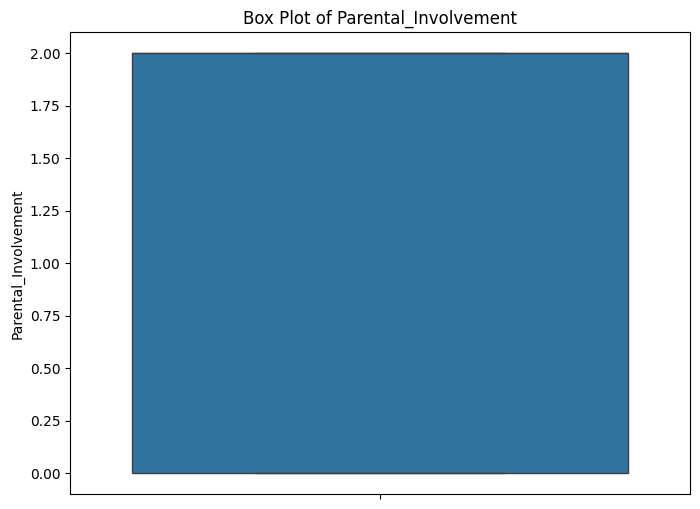

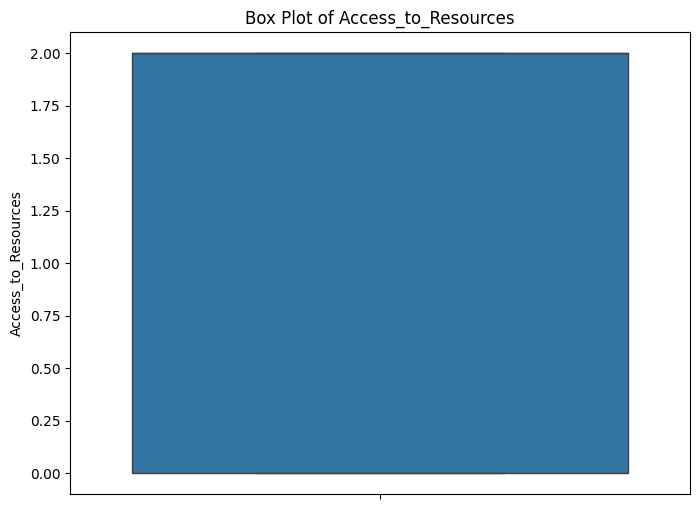

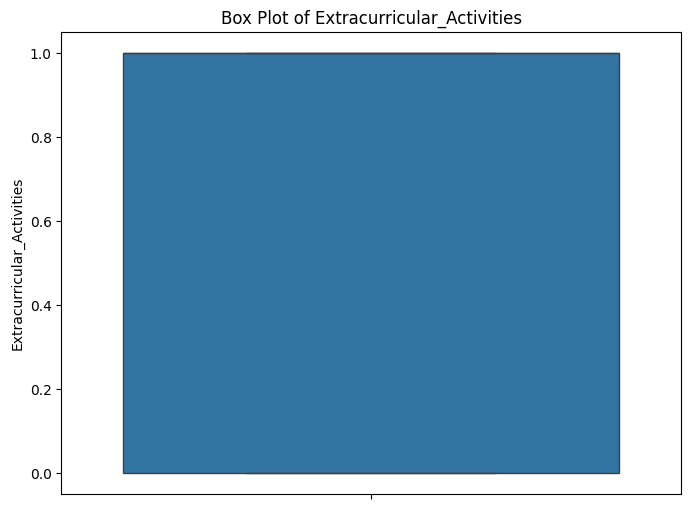

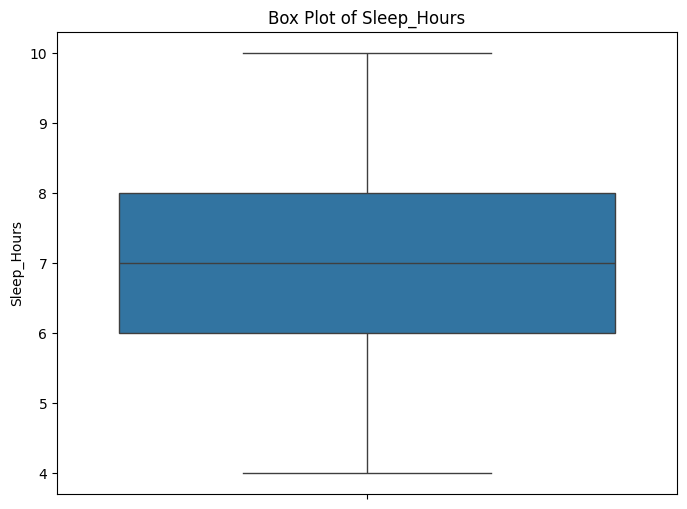

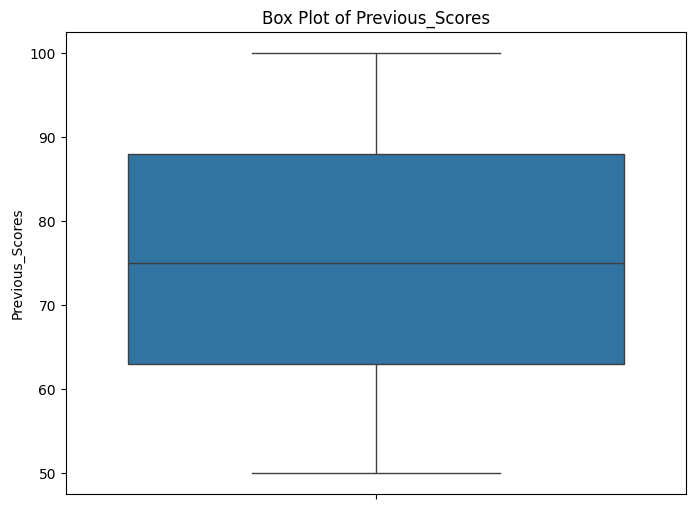

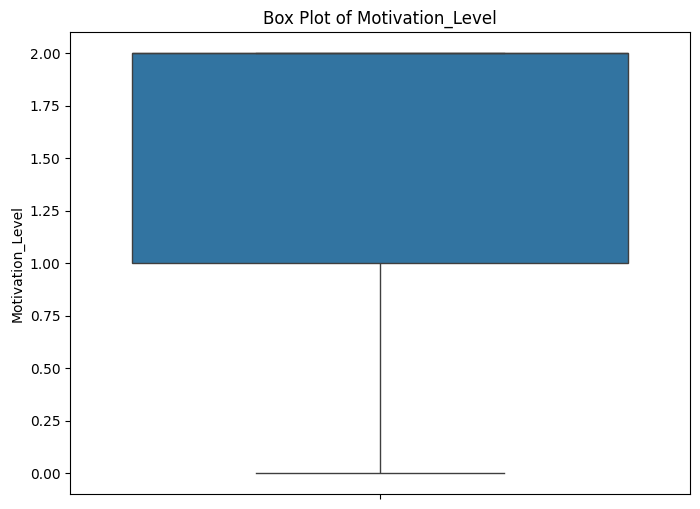

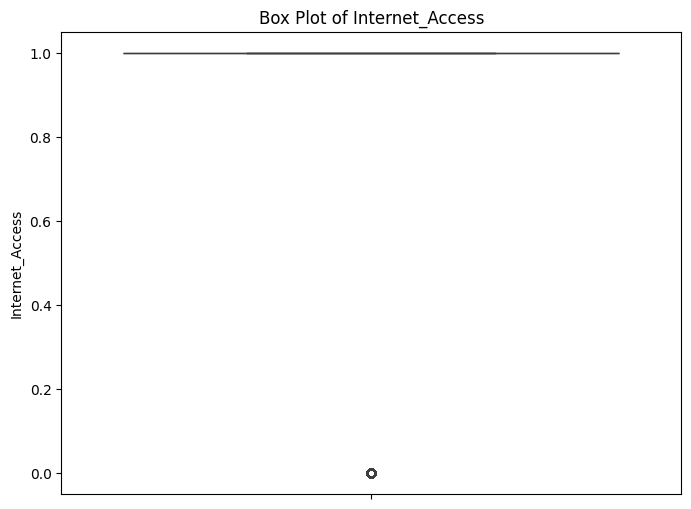

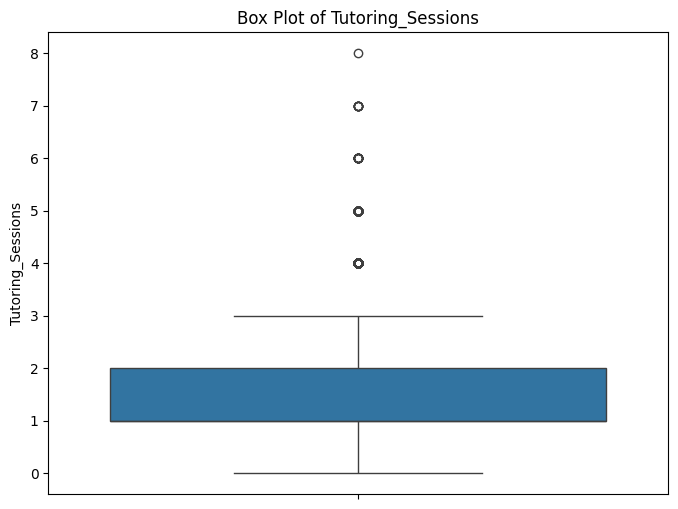

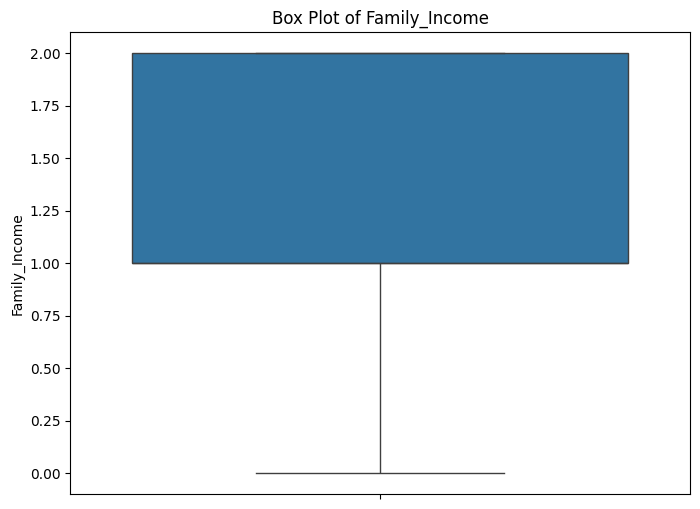

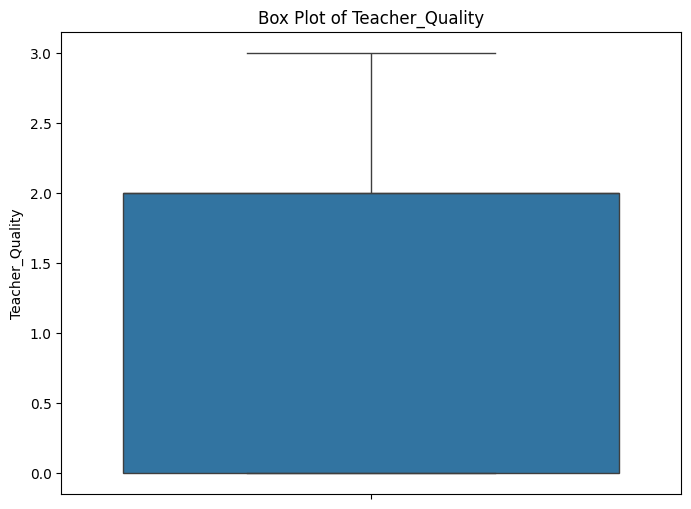

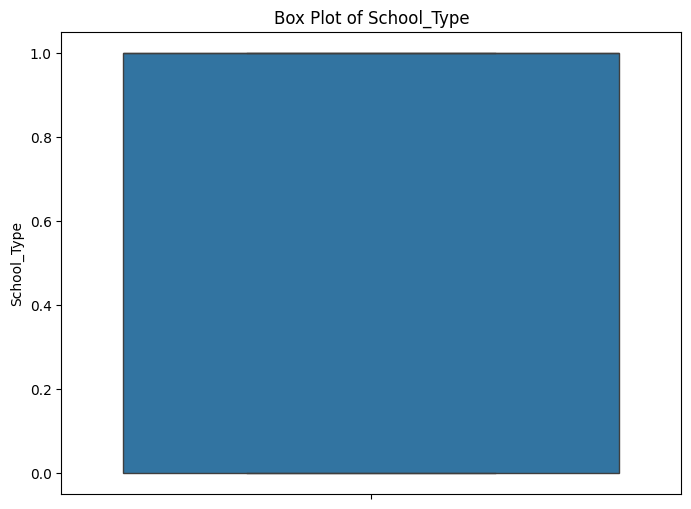

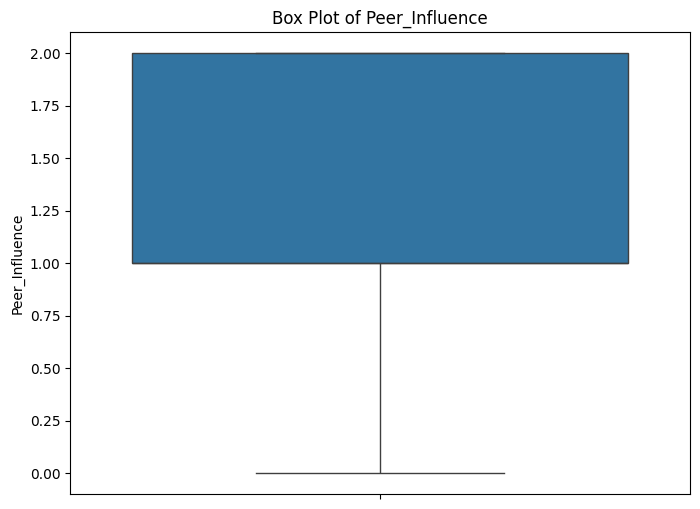

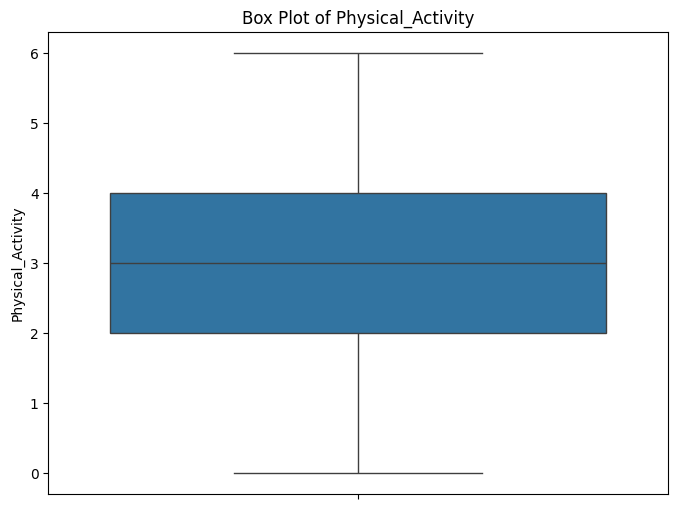

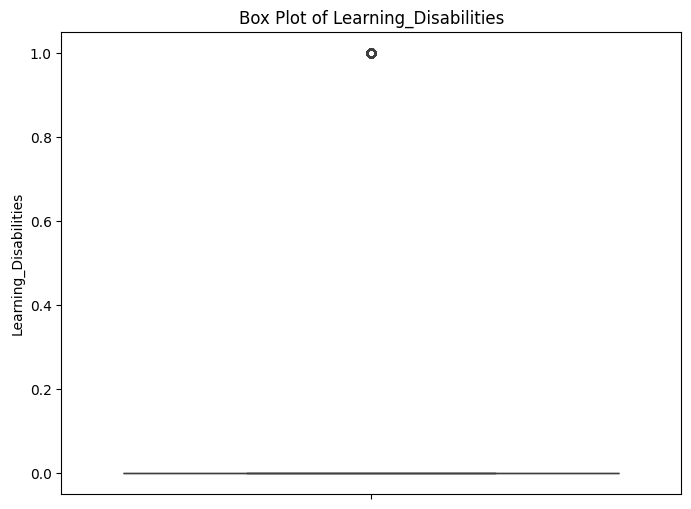

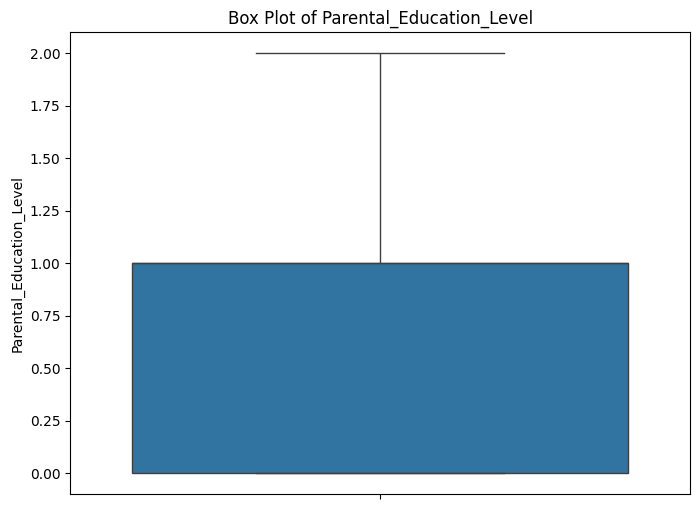

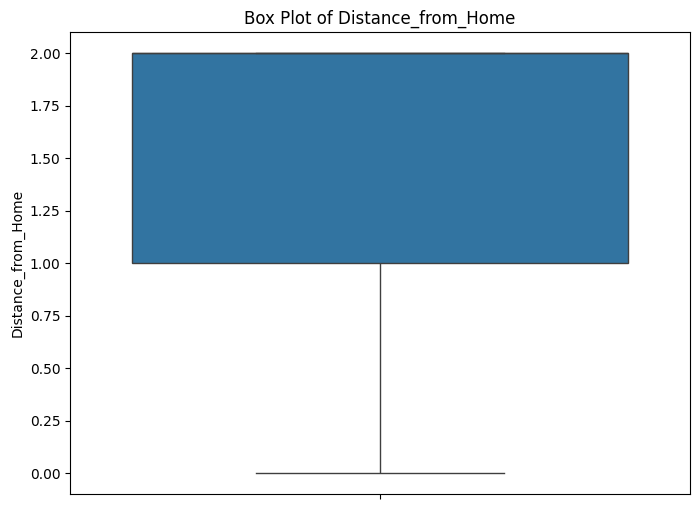

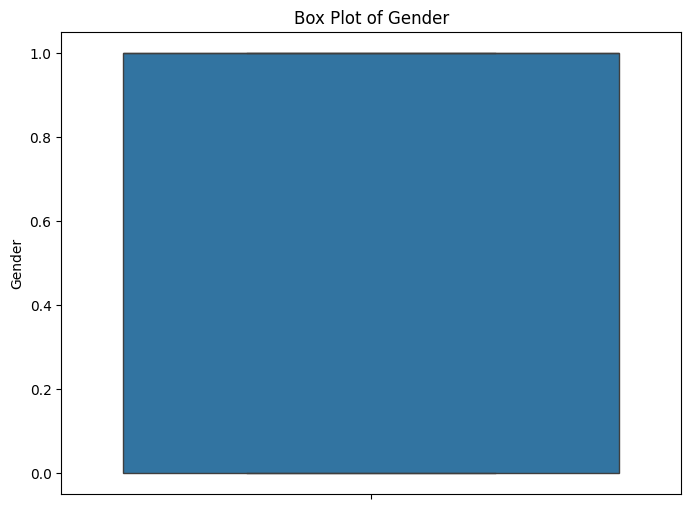

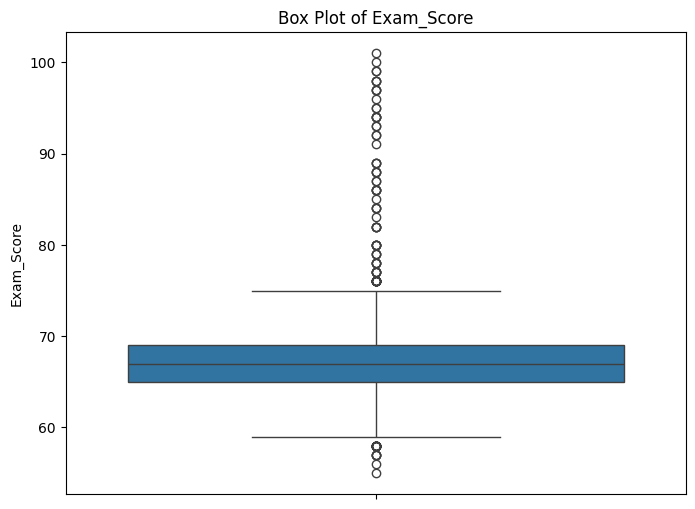

In [13]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for each remaining numeric column
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [14]:
def detect_outliers(df):
    outlier_counts = {}

    numeric_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns]

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)  # First quartile (25%)
        Q3 = df[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound

        # Count outliers in the column
        num_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        outlier_counts[col] = num_outliers

    return outlier_counts

In [15]:
def normalize_outliers(df):

    numeric_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns]

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR

        # Normalize outliers (cap values above the upper bound)
        df.loc[df[col] > upper_bound, col] = upper_bound

    return df

In [16]:
def regularize_outliers(df):

    numeric_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns]

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR

        # Regularize outliers (cap values below the lower bound)
        df.loc[df[col] < lower_bound, col] = lower_bound

    return df


In [17]:
print("\nOutliers BEFORE Handling:")
outlier_results_before = detect_outliers(df)
for col, count in outlier_results_before.items():
    print(f"{col}: {count} outliers")


Outliers BEFORE Handling:
Hours_Studied: 43 outliers
Attendance: 0 outliers
Parental_Involvement: 0 outliers
Access_to_Resources: 0 outliers
Extracurricular_Activities: 0 outliers
Sleep_Hours: 0 outliers
Previous_Scores: 0 outliers
Motivation_Level: 0 outliers
Internet_Access: 499 outliers
Tutoring_Sessions: 430 outliers
Family_Income: 0 outliers
Teacher_Quality: 0 outliers
School_Type: 0 outliers
Peer_Influence: 0 outliers
Physical_Activity: 0 outliers
Learning_Disabilities: 695 outliers
Parental_Education_Level: 0 outliers
Distance_from_Home: 0 outliers
Gender: 0 outliers
Exam_Score: 104 outliers


In [18]:
df = normalize_outliers(df)
df = regularize_outliers(df)

# Detect outliers after handling
print("\nOutliers AFTER Handling:")
outlier_results_after = detect_outliers(df)
for col, count in outlier_results_after.items():
    print(f"{col}: {count} outliers")


Outliers AFTER Handling:
Hours_Studied: 0 outliers
Attendance: 0 outliers
Parental_Involvement: 0 outliers
Access_to_Resources: 0 outliers
Extracurricular_Activities: 0 outliers
Sleep_Hours: 0 outliers
Previous_Scores: 0 outliers
Motivation_Level: 0 outliers
Internet_Access: 0 outliers
Tutoring_Sessions: 0 outliers
Family_Income: 0 outliers
Teacher_Quality: 0 outliers
School_Type: 0 outliers
Peer_Influence: 0 outliers
Physical_Activity: 0 outliers
Learning_Disabilities: 0 outliers
Parental_Education_Level: 0 outliers
Distance_from_Home: 0 outliers
Gender: 0 outliers
Exam_Score: 0 outliers


/tmp/ipython-input-1235419916.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] > upper_bound, col] = upper_bound
/tmp/ipython-input-1235419916.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '125.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] > upper_bound, col] = upper_bound
/tmp/ipython-input-1235419916.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] > upper_bound, col] = upper_bound
/tmp/ipython-input-1235419916.py:12: FutureWarning: Setting an item of 

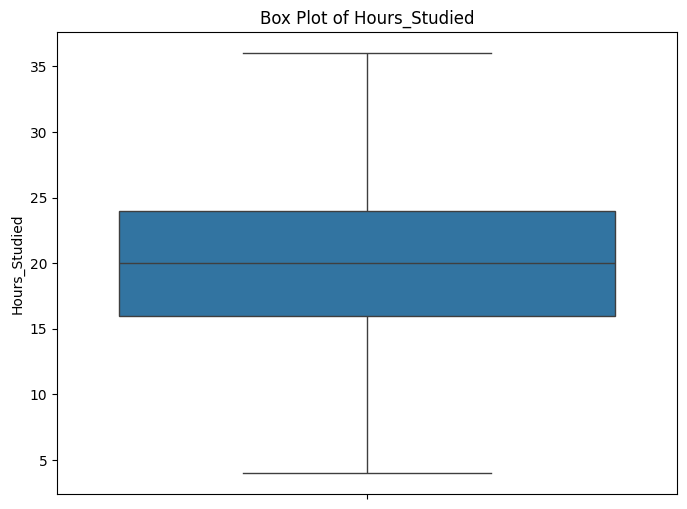

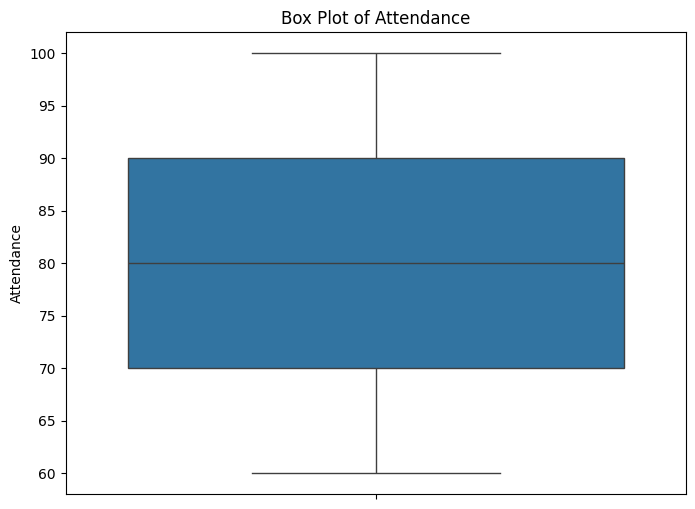

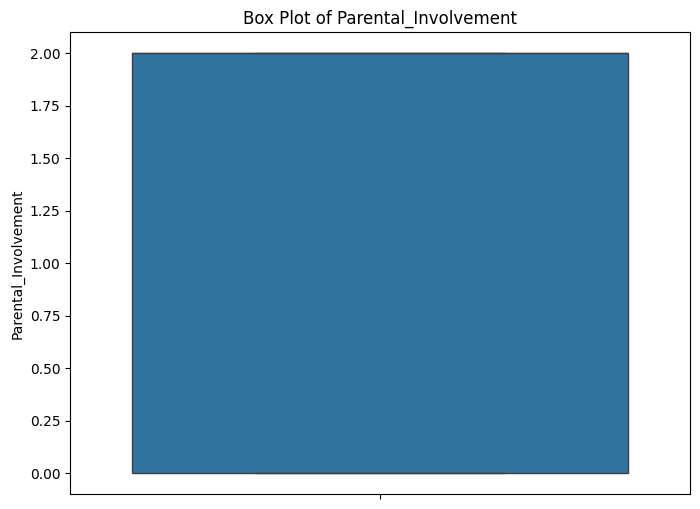

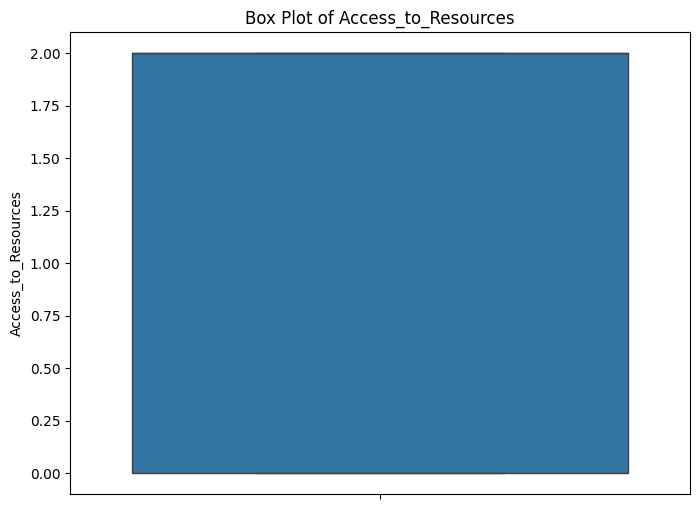

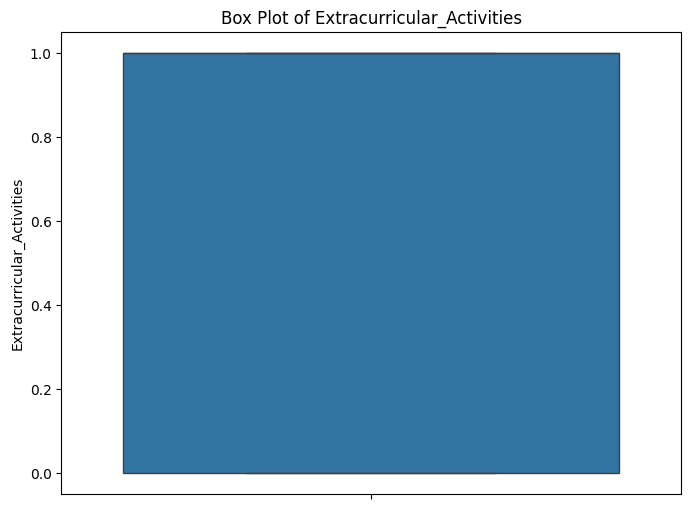

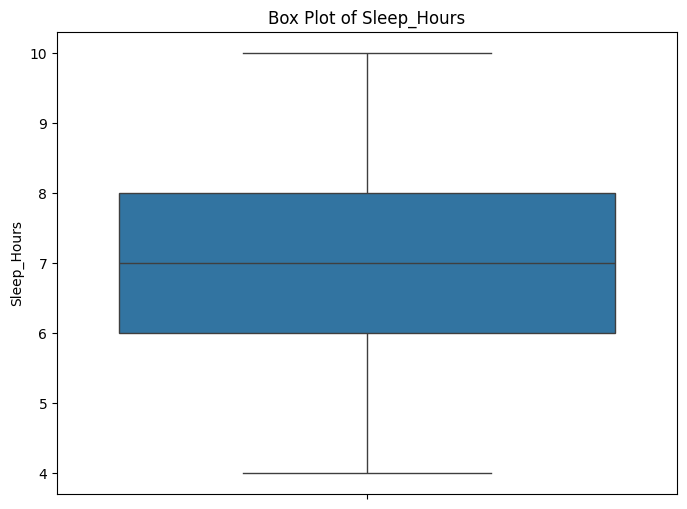

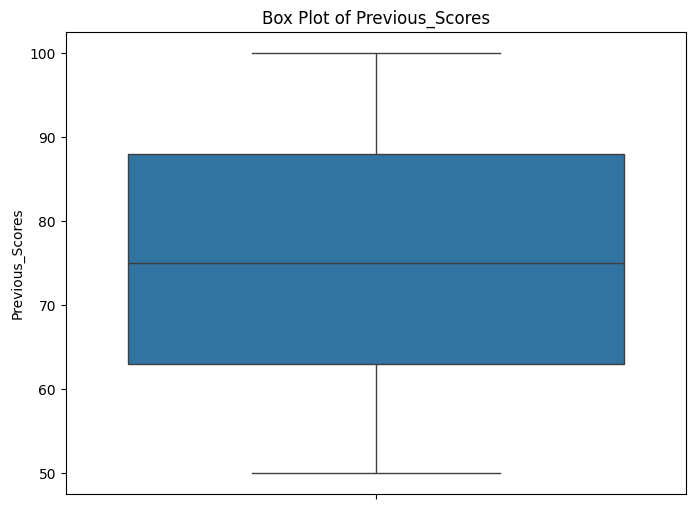

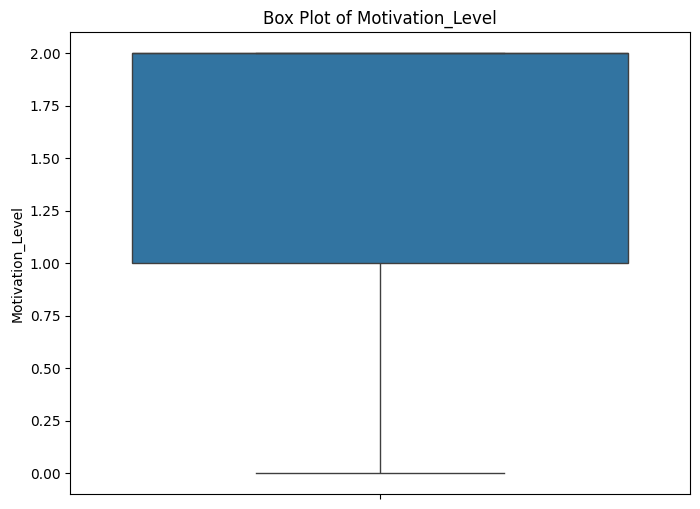

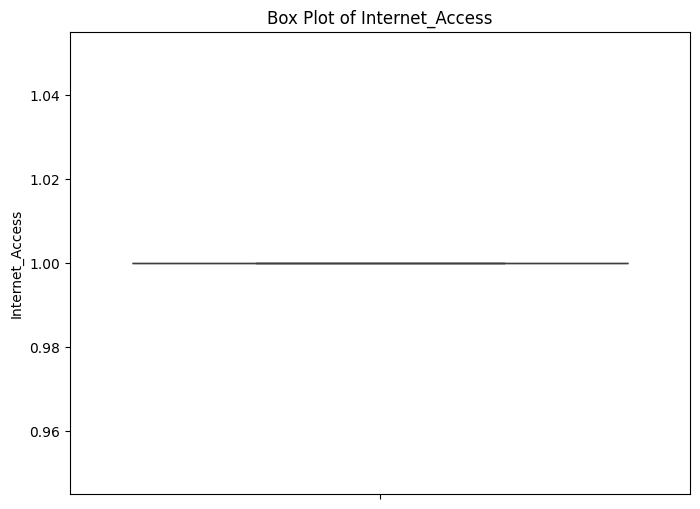

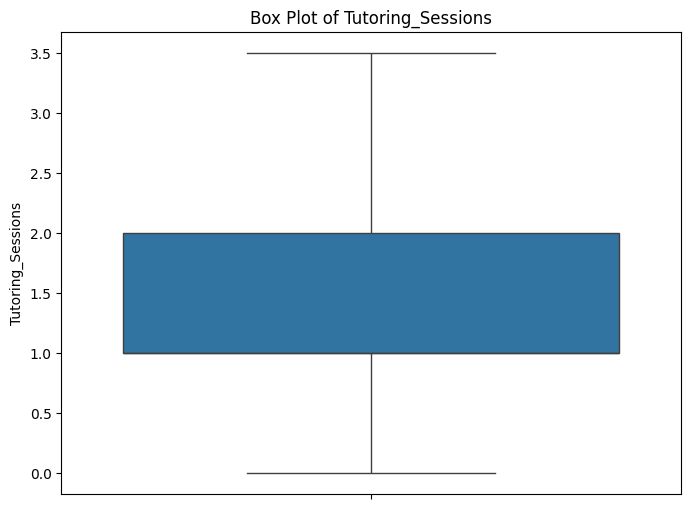

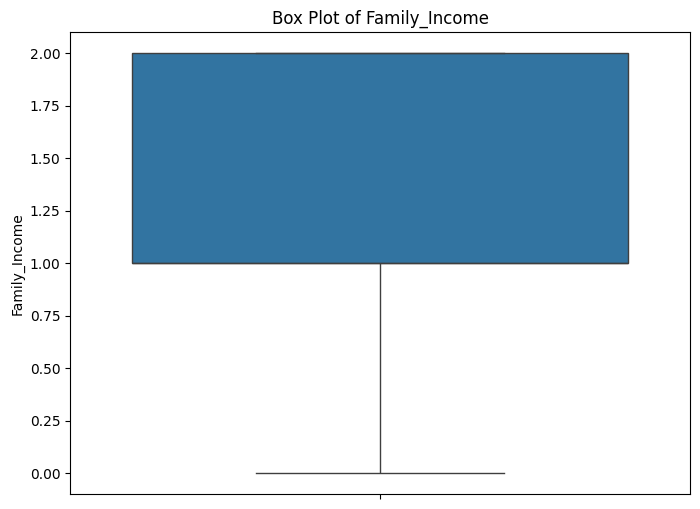

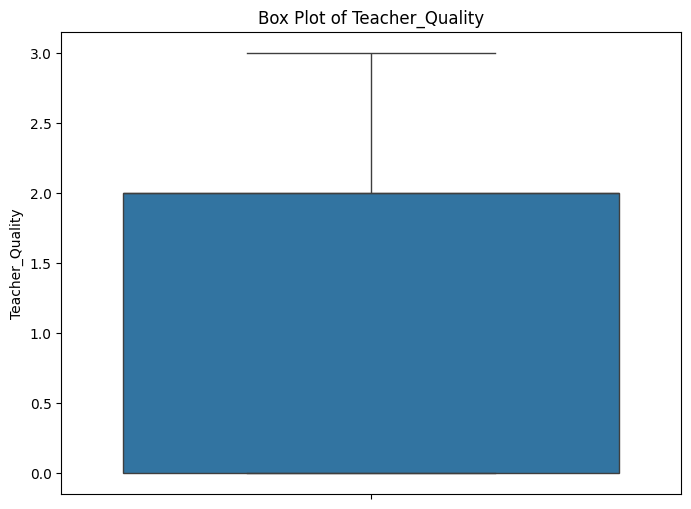

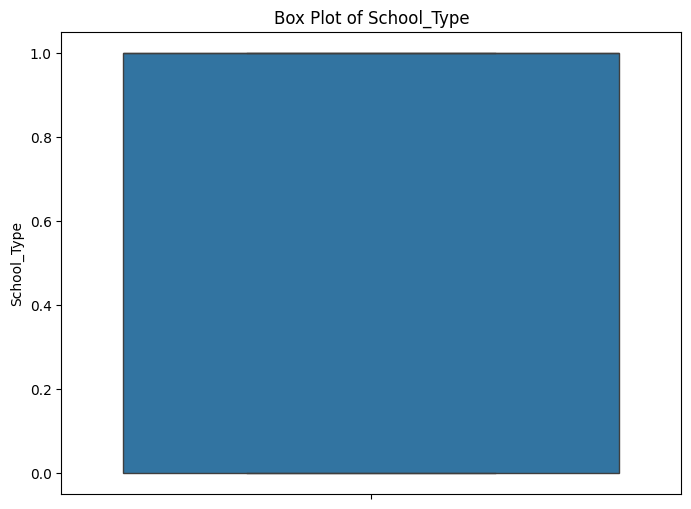

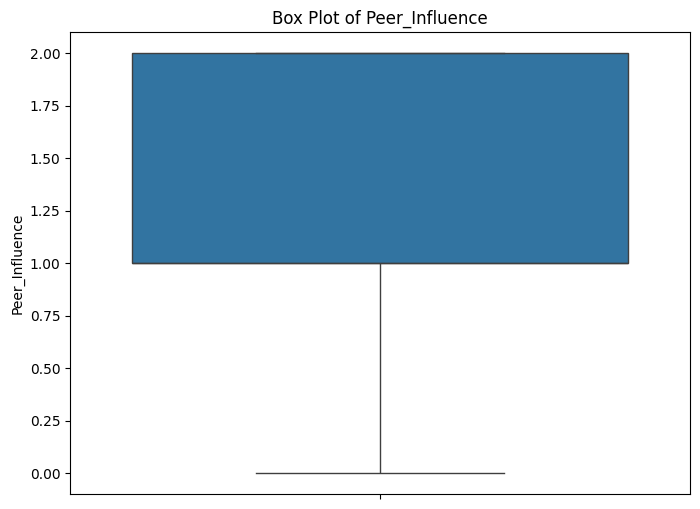

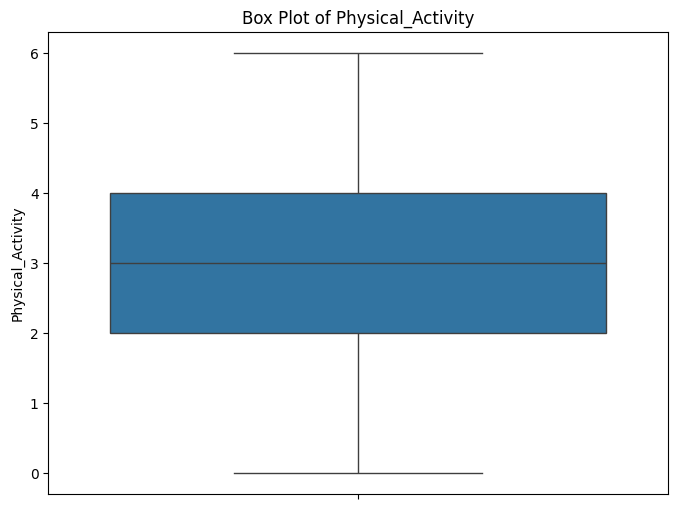

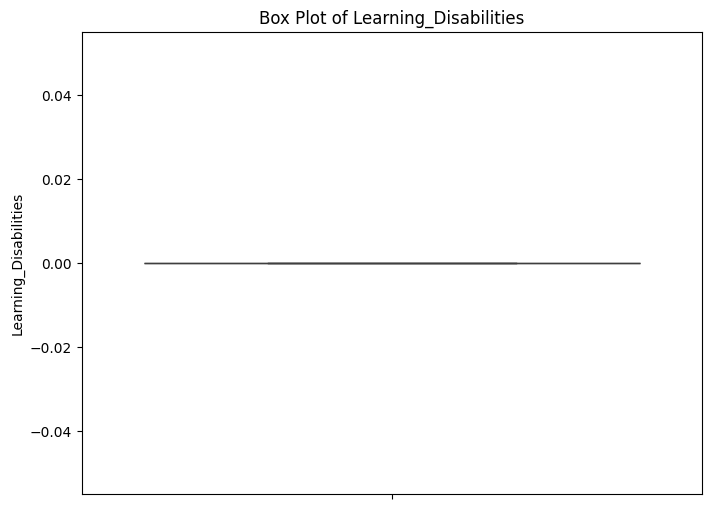

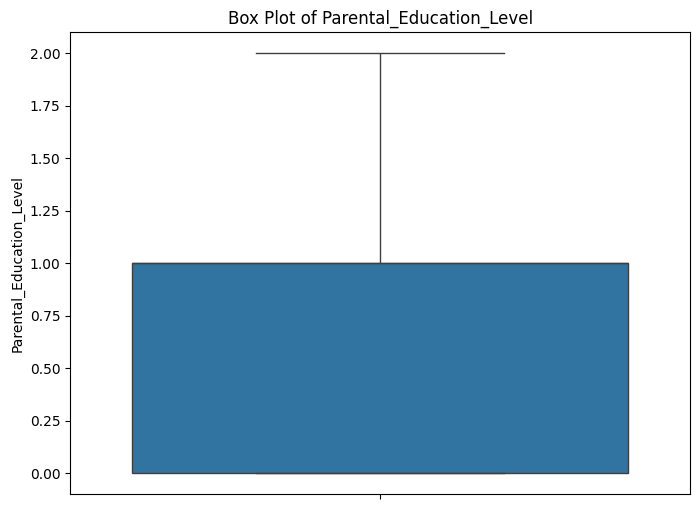

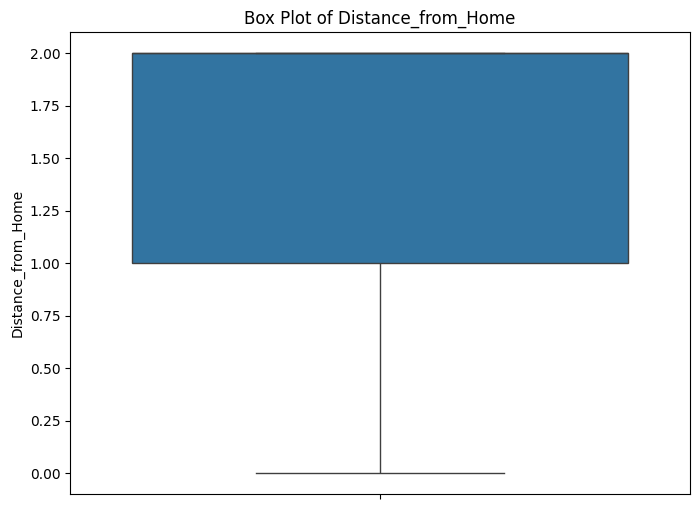

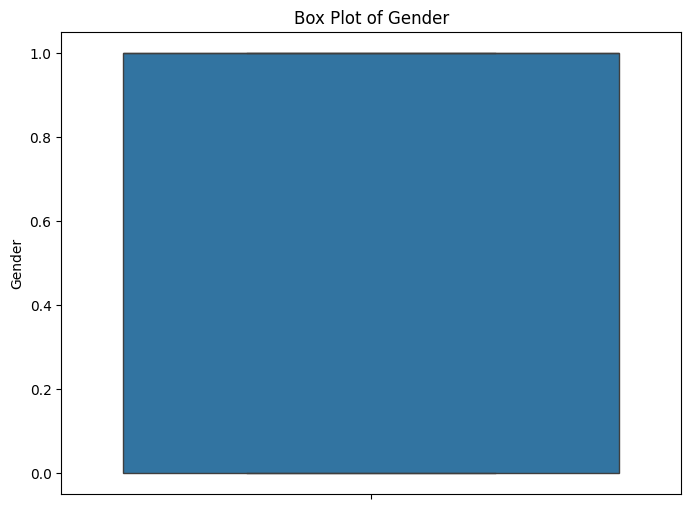

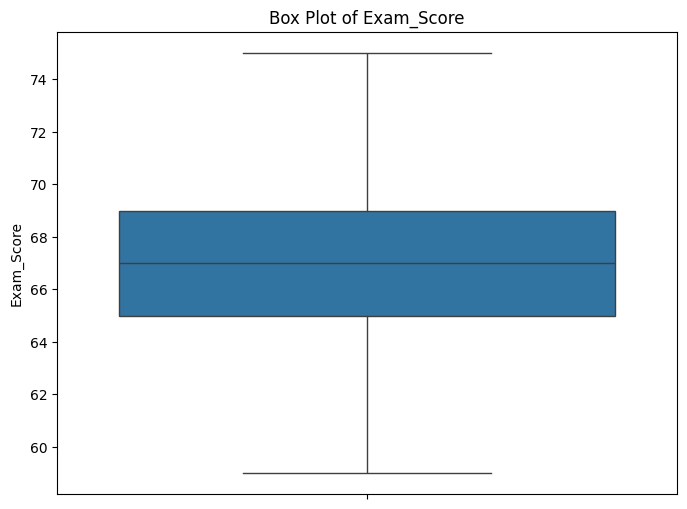

In [19]:
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

Model Parameters (θ): [ 4.07595330e+01  2.89285761e-01  1.94698068e-01 -3.98361141e-01
 -3.94904034e-01  4.97394847e-01 -3.99298615e-03  4.68841720e-02
 -1.41895811e-01 -9.99968361e-07  5.23789168e-01 -1.15819248e-01
 -2.07394621e-01 -6.30314873e-03  5.18895305e-01  1.84070830e-01
  0.00000000e+00  1.59723977e-01  4.83275541e-01  2.17887793e-02]

Mean Squared Error: 2.0135703267840825
R² Score: 0.822979481784154


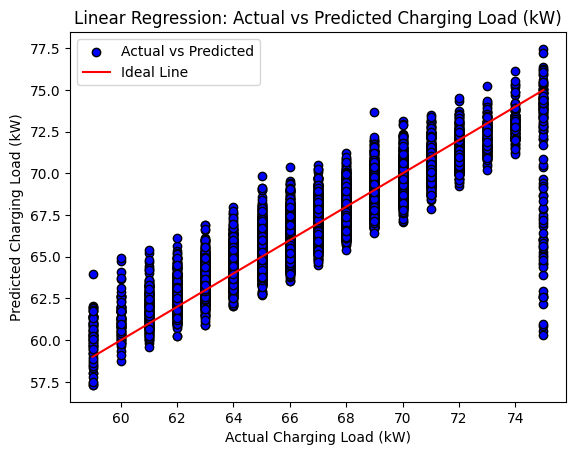

In [20]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# 2. Label Encoding for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# 3. Fill NaN for numeric columns with the mean of the column
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

X = df.drop(columns=["Exam_Score"]).values
y = df["Exam_Score"].values

# Add intercept (column of ones)
def add_intercept(X):
    return np.c_[np.ones((X.shape[0], 1)), X]  # Add a column of ones for intercept

X_b = add_intercept(X)

# 5. Scratch Linear Regression (No Libraries)
# Compute coefficients using the normal equation
def compute_coefficients(X, y, lambda_reg=1e-5):
    I = np.eye(X.shape[1])
    I[0, 0] = 0  # Do not regularize the intercept term
    return np.linalg.inv(X.T.dot(X) + lambda_reg * I).dot(X.T).dot(y)

theta = compute_coefficients(X_b, y, lambda_reg=1e-5)
print(f"Model Parameters (θ): {theta}")

# 6. Make predictions
def predict(X, theta):
    return X.dot(theta)

y_pred = predict(X_b, theta)

# 7. Evaluation (Mean Squared Error and R^2)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return 1 - (ss_residual / ss_total)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"\nMean Squared Error: {mse}")
print(f"R² Score: {r2}")

# 8. Visualization: Actual vs Predicted
plt.scatter(y, y_pred, color='blue', label="Actual vs Predicted", edgecolors='black')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', label="Ideal Line")
plt.xlabel('Actual Charging Load (kW)')
plt.ylabel('Predicted Charging Load (kW)')
plt.legend()
plt.title("Linear Regression: Actual vs Predicted Charging Load (kW)")
plt.show()

🔹 Ridge Regression Results:
Train R² Score: 0.8243
Test R² Score: 0.8168


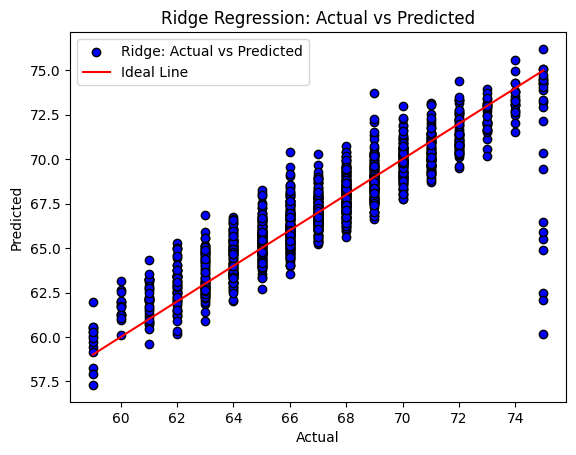

In [21]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Assuming X_train, X_test, y_train, y_test are already defined
best_ridge_model = Ridge(alpha=1.0)  # Example alpha value
best_ridge_model.fit(X_train, y_train)

# Predictions
y_pred_ridge = best_ridge_model.predict(X_test)

# R² Scores
ridge_train_r2 = best_ridge_model.score(X_train, y_train)
ridge_test_r2 = best_ridge_model.score(X_test, y_test)

# Print Scores
print("🔹 Ridge Regression Results:")
print(f"Train R² Score: {ridge_train_r2:.4f}")
print(f"Test R² Score: {ridge_test_r2:.4f}")

# Scatter Plot of Actual vs Predicted
plt.scatter(y_test, y_pred_ridge, color='blue', label="Ridge: Actual vs Predicted", edgecolors='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label="Ideal Line")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Actual vs Predicted')
plt.legend()
plt.show()



🔹 Lasso Regression Results:
Train R² Score: 0.8241
Test R² Score: 0.8165


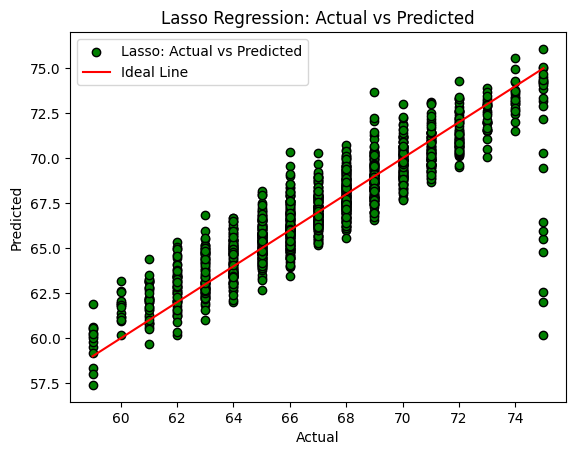

In [22]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Train Lasso Regression Model
lasso_model = Lasso(alpha=0.01)  # Adjust alpha as needed
lasso_model.fit(X_train, y_train)

# Predictions
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)  # Corrected name

# Evaluation: R² Scores
lasso_train_r2 = r2_score(y_train, y_train_pred_lasso)
lasso_test_r2 = r2_score(y_test, y_test_pred_lasso)

# Print Results
print("\n🔹 Lasso Regression Results:")
print(f"Train R² Score: {lasso_train_r2:.4f}")
print(f"Test R² Score: {lasso_test_r2:.4f}")

# Scatter Plot (Fix: Use `y_test_pred_lasso` instead of undefined `y_pred_lasso`)
plt.scatter(y_test, y_test_pred_lasso, color='green', label="Lasso: Actual vs Predicted", edgecolors='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label="Ideal Line")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.title("Lasso Regression: Actual vs Predicted")
plt.show()


In [23]:
ridge = Ridge()

# Define parameter grid for tuning
param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100, 1000]  # Regularization strength
}

# Apply GridSearchCV
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

# Get the best model and its parameters
best_ridge_model = grid_search_ridge.best_estimator_
best_ridge_params = grid_search_ridge.best_params_

# Make predictions with the best model
y_train_pred_ridge = best_ridge_model.predict(X_train)
y_test_pred_ridge = best_ridge_model.predict(X_test)

# Evaluation: R² Scores
ridge_train_r2 = r2_score(y_train, y_train_pred_ridge)
ridge_test_r2 = r2_score(y_test, y_test_pred_ridge)

print("\nBest Ridge Regression Hyperparameters:", best_ridge_params)
print(f"Train R² Score: {ridge_train_r2:.4f}")
print(f"Test R² Score: {ridge_test_r2:.4f}")



Best Ridge Regression Hyperparameters: {'alpha': 10}
Train R² Score: 0.8243
Test R² Score: 0.8168


In [24]:
lasso = Lasso()

# Define parameter grid for tuning
param_grid_lasso = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Apply GridSearchCV
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

# Get the best model and its parameters
best_lasso_model = grid_search_lasso.best_estimator_
best_lasso_params = grid_search_lasso.best_params_

# Make predictions with the best model
y_train_pred_lasso = best_lasso_model.predict(X_train)
y_test_pred_lasso = best_lasso_model.predict(X_test)

# Evaluation: R² Scores
lasso_train_r2 = r2_score(y_train, y_train_pred_lasso)
lasso_test_r2 = r2_score(y_test, y_test_pred_lasso)

print("\n🔹 Best Lasso Regression Hyperparameters:", best_lasso_params)
print(f"Train R² Score: {lasso_train_r2:.4f}")
print(f"Test R² Score: {lasso_test_r2:.4f}")


🔹 Best Lasso Regression Hyperparameters: {'alpha': 0.01}
Train R² Score: 0.8241
Test R² Score: 0.8165


In [25]:
best_ridge_model = grid_search_ridge.best_estimator_

# Perform 5-fold Cross Validation on the Ridge model
cv_ridge_scores = cross_val_score(best_ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_ridge_scores = -cv_ridge_scores

# Print results
print("\nRidge Regression Cross-Validation Results:")
print(f"Cross-Validation Mean Squared Error: {cv_ridge_scores.mean():.4f}")
print(f"Cross-Validation Standard Deviation: {cv_ridge_scores.std():.4f}")


Ridge Regression Cross-Validation Results:
Cross-Validation Mean Squared Error: 2.0257
Cross-Validation Standard Deviation: 0.2696


In [26]:
best_lasso_model = grid_search_lasso.best_estimator_

# Perform 5-fold Cross Validation on the Lasso model
cv_lasso_scores = cross_val_score(best_lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_lasso_scores = -cv_lasso_scores

# Print results
print("\n🔹 Lasso Regression Cross-Validation Results:")
print(f"Cross-Validation Mean Squared Error: {cv_lasso_scores.mean():.4f}")
print(f"Cross-Validation Standard Deviation: {cv_lasso_scores.std():.4f}")


🔹 Lasso Regression Cross-Validation Results:
Cross-Validation Mean Squared Error: 2.0274
Cross-Validation Standard Deviation: 0.2657


In [27]:
# 🔹 **Step 1: Compute Feature Importance from Lasso Regression**
feature_names = df.drop(columns=["Exam_Score"]).columns  # Exclude target variable

lasso = Lasso(alpha=0.01)  # Use a small alpha to avoid eliminating too many features
lasso.fit(X_train, y_train)
lasso_feature_importance = np.abs(lasso.coef_)  # Absolute values for importance

# 🔹 **Step 2: Compute Feature Importance from Ridge Regression**
ridge = Ridge(alpha=1.0)  # Set regularization strength
ridge.fit(X_train, y_train)
ridge_feature_importance = np.abs(ridge.coef_)  # Absolute values for importance

# 🔹 **Step 3: Combine Feature Importances**
feature_importance_combined = (lasso_feature_importance + ridge_feature_importance) / 2  # Averaging both methods

# 🔹 **Step 4: Get Top 20 Features Instead of 10**
# Increasing the number of selected features from 10 to 20
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importance_combined
}).sort_values(by="Importance", ascending=False)

top_20_features = feature_importance_df.head(20)
best_features = top_20_features["Feature"].values  # Get feature names

print("\n🔹 Top 20 Most Important Features:")
print(top_20_features)

# 🔹 **Step 5: Select Top 20 Features**
# Select the top 20 most important features for both train and test datasets
X_train_selected = X_train[:, feature_importance_df.index[:20]]  # Select columns using integer indices
X_test_selected = X_test[:, feature_importance_df.index[:20]]  # Select columns using integer indices

# 🔹 **Step 6: Train & Evaluate Lasso Regression**
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_selected, y_train)

y_train_pred_lasso = lasso_model.predict(X_train_selected)
y_test_pred_lasso = lasso_model.predict(X_test_selected)

lasso_train_r2 = r2_score(y_train, y_train_pred_lasso)
lasso_test_r2 = r2_score(y_test, y_test_pred_lasso)

print("\n🔹 Lasso Regression Results:")
print(f"Train R² Score: {lasso_train_r2:.4f}")
print(f"Test R² Score: {lasso_test_r2:.4f}")

# 🔹 **Step 7: Train & Evaluate Ridge Regression**
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_selected, y_train)

y_train_pred_ridge = ridge_model.predict(X_train_selected)
y_test_pred_ridge = ridge_model.predict(X_test_selected)

ridge_train_r2 = r2_score(y_train, y_train_pred_ridge)
ridge_test_r2 = r2_score(y_test, y_test_pred_ridge)

print("\n🔹 Ridge Regression Results:")
print(f"Train R² Score: {ridge_train_r2:.4f}")
print(f"Test R² Score: {ridge_test_r2:.4f}")



🔹 Top 20 Most Important Features:
                       Feature  Importance
9            Tutoring_Sessions    0.515130
17          Distance_from_Home    0.511409
13              Peer_Influence    0.507131
4   Extracurricular_Activities    0.451107
3          Access_to_Resources    0.393005
2         Parental_Involvement    0.387930
0                Hours_Studied    0.290932
11             Teacher_Quality    0.197981
1                   Attendance    0.194446
14           Physical_Activity    0.184512
16    Parental_Education_Level    0.150155
7             Motivation_Level    0.115751
10               Family_Income    0.094634
6              Previous_Scores    0.048155
12                 School_Type    0.010028
18                      Gender    0.003136
5                  Sleep_Hours    0.000778
8              Internet_Access    0.000000
15       Learning_Disabilities    0.000000

🔹 Lasso Regression Results:
Train R² Score: 0.8241
Test R² Score: 0.8165

🔹 Ridge Regression Results:
Tr


🔹 Lasso Regression Results:
Train R² Score: 0.8241
Test R² Score: 0.8165

🔹 Ridge Regression Results:
Train R² Score: 0.8243
Test R² Score: 0.8168


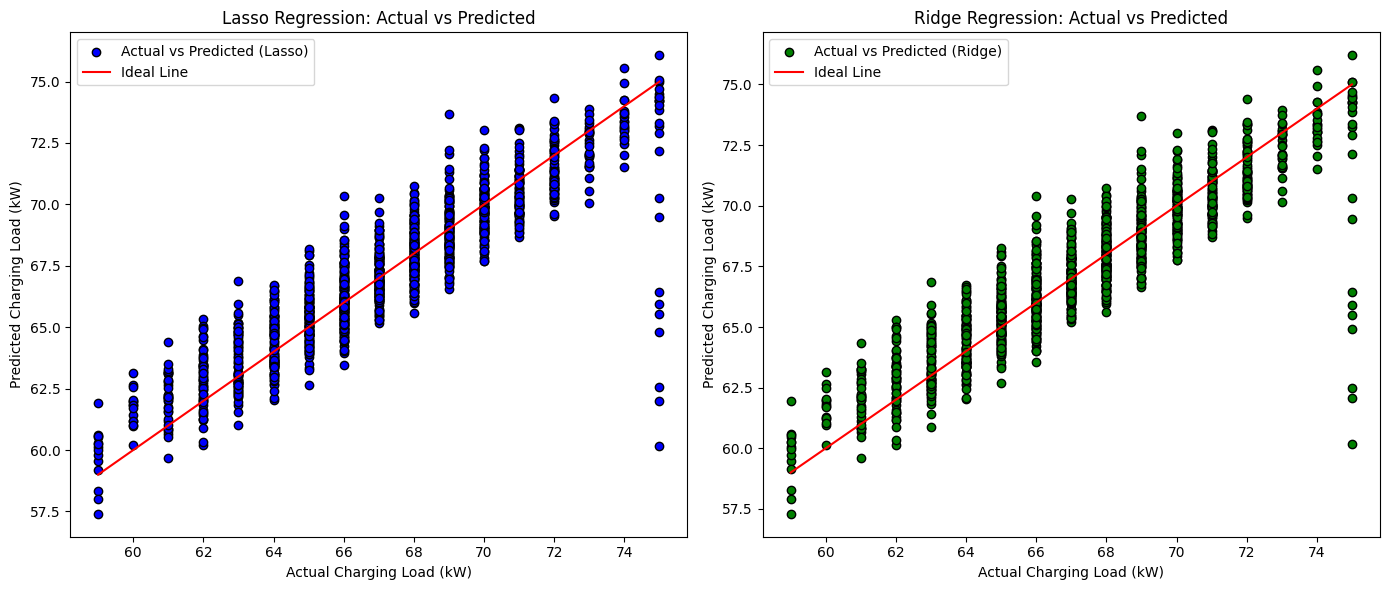

In [28]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_selected, y_train)

y_train_pred_lasso = lasso_model.predict(X_train_selected)
y_test_pred_lasso = lasso_model.predict(X_test_selected)

lasso_train_r2 = r2_score(y_train, y_train_pred_lasso)
lasso_test_r2 = r2_score(y_test, y_test_pred_lasso)

print("\n🔹 Lasso Regression Results:")
print(f"Train R² Score: {lasso_train_r2:.4f}")
print(f"Test R² Score: {lasso_test_r2:.4f}")

# 🔹 **Step 8: Train & Evaluate Ridge Regression**
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_selected, y_train)

y_train_pred_ridge = ridge_model.predict(X_train_selected)
y_test_pred_ridge = ridge_model.predict(X_test_selected)

ridge_train_r2 = r2_score(y_train, y_train_pred_ridge)
ridge_test_r2 = r2_score(y_test, y_test_pred_ridge)

print("\n🔹 Ridge Regression Results:")
print(f"Train R² Score: {ridge_train_r2:.4f}")
print(f"Test R² Score: {ridge_test_r2:.4f}")

# 🔹 **Step 9: Plot Actual vs Predicted**
plt.figure(figsize=(14, 6))

# Lasso Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_lasso, color='blue', label="Actual vs Predicted (Lasso)", edgecolors='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label="Ideal Line")
plt.xlabel('Actual Charging Load (kW)')
plt.ylabel('Predicted Charging Load (kW)')
plt.title('Lasso Regression: Actual vs Predicted')
plt.legend()

# Ridge Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_ridge, color='green', label="Actual vs Predicted (Ridge)", edgecolors='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label="Ideal Line")
plt.xlabel('Actual Charging Load (kW)')
plt.ylabel('Predicted Charging Load (kW)')
plt.title('Ridge Regression: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()
